# Distributions and Basic Statistics

## *Workshop 7*  [![Open In Colab](../colab-badge.png)](https://colab.research.google.com/github/oballinger/QM2/blob/main/notebooks/W07.%20Distributions%20and%20Basic%20Statistics.ipynb)

For the rest of this course, we'll be working with data from the U.S. Census [Current Population Survey (CPS)](https://www.census.gov/programs-surveys/cps.html). 

### Aims:

- Choosing appropriate summary statistics for varying distributions

- Understanding:
    - The nature of our dataset, including potential bias
    - How to generate summary statistics for our dataset
    - The distribution of different variables
    - The intuition behind the Central Limit Theorem

## Getting Started

### First Things First: Bias
Once we've acquired a dataset, the first step is *always* to develop an understanding of where the data has come from. For this dataset, use the following [documentation page](https://www.census.gov/programs-surveys/cps/technical-documentation/methodology.html) to answer the questions below: 

1) What is the population of interest?
2) What was the sampling strategy?
3) What are potential sources of selection bias?

I'll start by importing the libraries I need: matplotlib (for graphs), pandas (for data), numpy (for maths) and random (for generating random numbers):

In [133]:
#This is a comment - python does not try to execute it

#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline  
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)


## 

The first thing to notice is that I'm using an **alias** for matplotlib.pyplot -  it's a bit ungainly, so I'm using "plt" in its place. That's just to make the coding easier. I'll do the same for some of the other libraries as we go through - this isn't necessary, but online examples frequently use "pd" for "pandas" (for example), so it can be useful to use these. The way it works is pretty simple - now I've used "plt" as my alias for matplotlib.pyplot, I can just say "plt.*command()*" whenever I need to use functions from that library.

Now that I've imported the libraries I'm going to be using, I'm ready to import the data: 

In [134]:
df=pd.read_csv('./data/wk7/cps.csv')
df.head()

,year,state,age,sex,race,sch,ind,union,incwage,realhrwage,occupation
0,1990,36,58,1,3,12.0,871,0.0,14200.0,12.269874,Office and Admin Support
1,2009,5,28,1,1,12.0,8660,1.0,17680.0,8.635149,Office and Admin Support
2,1990,36,37,1,1,14.0,380,1.0,28000.0,21.169851,.
3,1990,6,34,1,1,18.0,740,1.0,27500.0,20.447746,Computer and Math Technicians
4,1981,51,38,1,4,13.0,798,NaN,17000.0,18.892282,Managers


Our dataframe has 10 columns:

1. *year*: Survey year
2. *age*: the person's age
3. *sex*: the person's sex 
    * 1=male
    * 2=female
4. *race*: the person's race 
    * White non hispanic=1
    * Black non hispanic=2
    * Hispanic=3
    * Other non hispanic=4)
5. *sch*: Educational attainment
    * None = 0, 
    * Grades 1-12 = 1-12
    * Some University = 13, 
    * Associate's degree = 14, 
    * BA = 16
    * Advanced Degree = 18
6. *union*: Union membership 
    * N/A = 0, 
    * No union coverage = 1, 
    * Member of labor union=2, 
    * Covered by union but not a member=3
7. *incwage*: Wage and salary income
8. *realhrwage*: Real Hourly Wage
9. *occupation*: Occupation
10. *ind*: [industry code](https://www.census.gov/naics/?58967?yearbck=2002)

Based on the data 

## Summary Statistics

After thinking about the origins of our dataset and loading it into python, the next step is to generate summary statistics. This is vital for us to better understand our data. Pandas has a useful function, `describe`, which will generate summary statistics for all numerical variables in our entire dataframe:

In [135]:
df.describe()

,year,state,age,sex,race,sch,ind,union,incwage,realhrwage
count,344287.000000,344287.000000,344287.000000,344287.000000,344287.000000,344287.000000,344287.000000,301908.000000,3.442870e+05,344287.000000
mean,2002.599122,28.121004,41.734364,1.489057,1.570077,13.498057,4235.846009,0.221505,3.976170e+04,22.886629
std,10.831555,15.818556,10.415874,0.499881,0.952252,2.799038,3468.163157,0.499690,4.529758e+04,506.489695
min,1981.000000,1.000000,25.000000,1.000000,1.000000,0.000000,10.000000,0.000000,1.500000e+01,2.000000
25%,1990.000000,13.000000,33.000000,1.000000,1.000000,12.000000,760.000000,0.000000,1.670000e+04,11.723004
50%,2007.000000,28.000000,41.000000,1.000000,1.000000,13.000000,4270.000000,0.000000,3.000000e+04,17.698591
75%,2011.000000,41.000000,50.000000,2.000000,2.000000,16.000000,7860.000000,0.000000,5.000000e+04,26.442308
max,2013.000000,56.000000,64.000000,2.000000,4.000000,18.000000,9590.000000,3.000000,1.259999e+06,294610.968750


`describe` returns a dataframe with the same columns as the source dataframe. For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median. Given these summary statistics, answer the following questions: 

1) what is the median hourly wage?
2) what is the average age?
3) are there more men or women?
4) intepret the mean of the "race" column. 

The answer to the last question should provoke some futher thought; the race column is categorical, but because it contains numbers it's being treated as numerical. The mean of a categorical variable is meaningless; For object data (e.g. categories, strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

Let's convert the race column from a numerical variable into a categorical one, and try `describe` once again:

In [136]:
df.dtypes

year            int64
state           int64
age             int64
sex             int64
race            int64
sch           float64
ind             int64
union         float64
incwage       float64
realhrwage    float64
occupation     object
dtype: object

In [137]:
df['race']=df['race'].astype('category')
df['race'].describe()

count     344287
unique         4
top            1
freq      240382
Name: race, dtype: int64

what other variables are categorical? Convert them to categorical and describe. What is the most common occupation in this dataset?

In [138]:
# convert the variables to categorical and describe

These statistics are useful, but suppose we want detailed counts of the number of individuals in each category; For this, we can use the `groupby` function, with the `.size()` operator which simply counts the number of rows in each category. 

In [139]:
occupations= df.groupby('occupation').size()
occupations.sort_values(ascending=False)

occupation
.                                         132708
Office and Admin Support                   50635
Managers                                   35696
Consruction, Extraction, Installation      30579
Production                                 29732
Transportation and materials moving        21277
Computer and Math Technicians               8602
Protective Service adj_occupations          7809
financial Operators                         7702
Business Operators                          7327
Community and Social Workers                6025
Lawyers, Judges,Physicans and dentists      3835
Farming, Fishing & Forestry                 2360
dtype: int64

What is the most common profession? 


# Distributions

Now that we've cleaned our data up, let's have a closer look at the *distribution* of our data. The best way to do this is using a histogram. Let's start by looking at the distribution of the `incwage` variable:

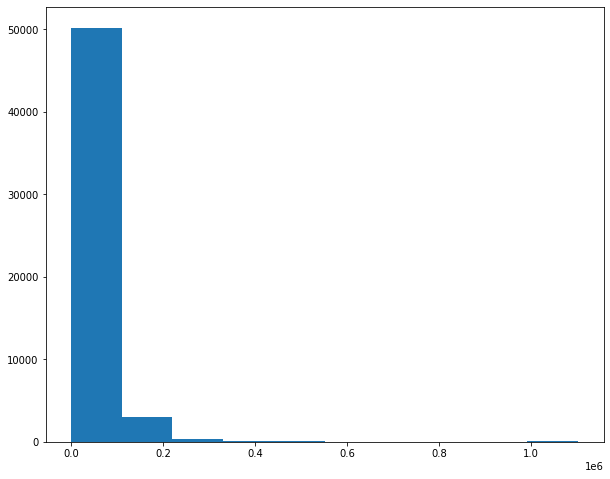

In [140]:
df=df[df['year']==2013]

plt.hist(df['incwage'])
plt.show()

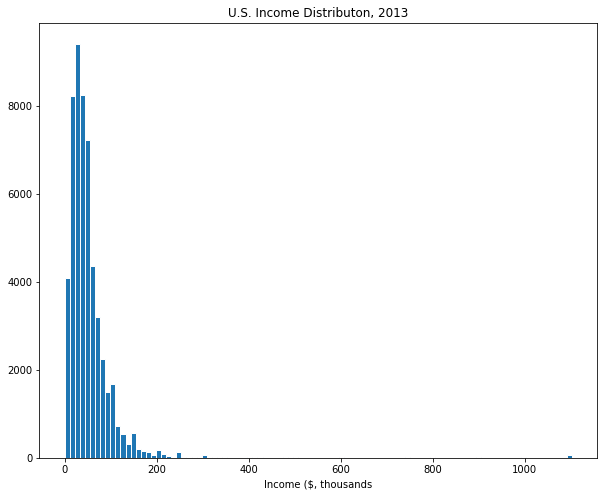

In [141]:
income=df['incwage']/1000

plt.hist(income, bins=100, edgecolor='white')
plt.xlabel('Income ($, thousands')
plt.title("U.S. Income Distributon, 2013")

plt.show()

mean    51.821863
50%     40.000000
std     60.163449
Name: incwage, dtype: float64


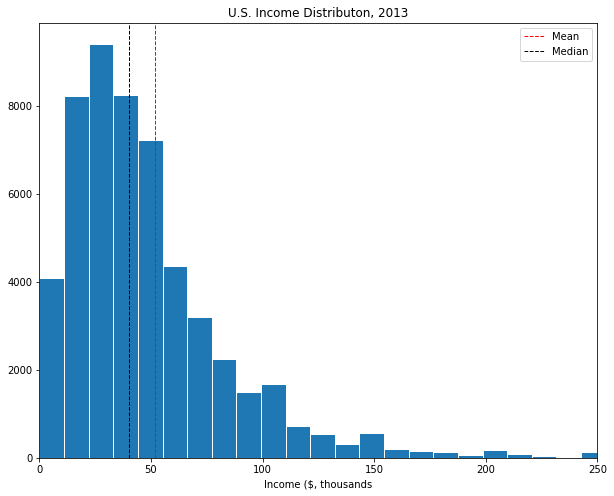

In [142]:
inc_summary=income.describe()
print(inc_summary[['mean','50%','std']])

plt.hist(income, bins=100, edgecolor='white')
plt.axvline(inc_summary['mean'], color='red', linestyle='dashed', linewidth=1,label='Mean')
plt.axvline(inc_summary['50%'], color='black', linestyle='dashed', linewidth=1, label='Median')

plt.legend()
plt.xlabel('Income ($, thousands')
plt.title("U.S. Income Distributon, 2013")
plt.xlim(0,250)
plt.show()

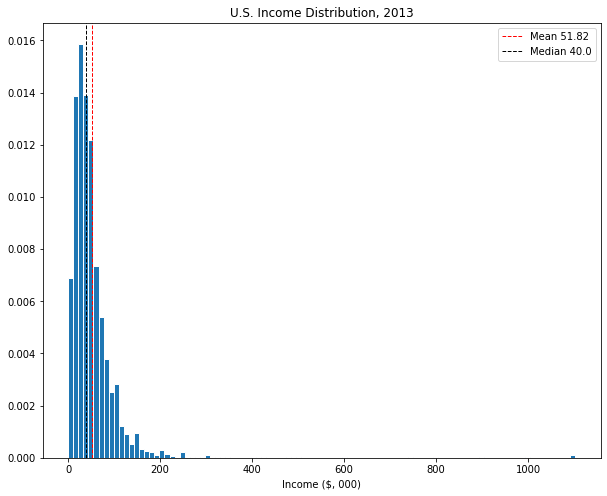

In [143]:
def plot_histogram(variable, bins, xlab, title):
	summary=variable.describe()
	plt.hist(variable, bins=bins,edgecolor='white', density=True)
	plt.axvline(summary['mean'], color='red', linestyle='dashed', linewidth=1,label='Mean '+str(round(summary['mean'],2)))
	plt.axvline(summary['50%'], color='black', linestyle='dashed', linewidth=1, label='Median '+str(round(summary['50%'],2)))

	plt.legend()
	plt.xlabel(xlab)
	plt.title(title)
	plt.show()

plot_histogram(df['incwage']/1000, bins=100, xlab='Income ($, 000)',title='U.S. Income Distribution, 2013')

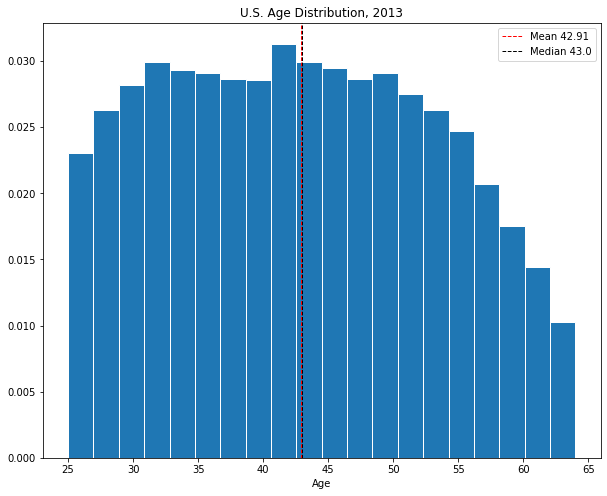

In [144]:
plot_histogram(df['age'], bins=20, xlab='Age',title='U.S. Age Distribution, 2013')

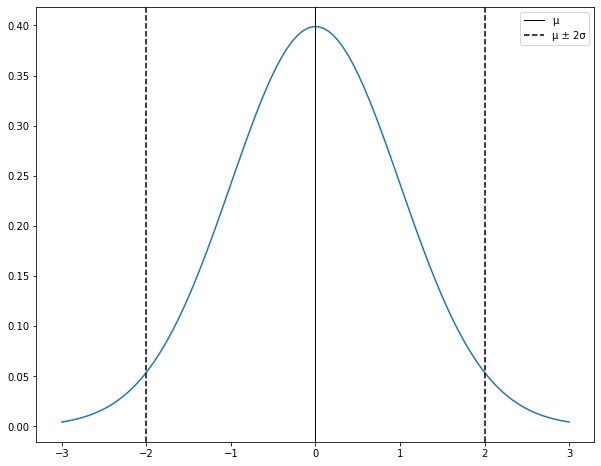

In [145]:
mu, se= 0, 1
x = np.linspace(mu - 3*se, mu + 3*se, 100)
plt.plot(x, norm.pdf(x, mu, se))
plt.axvline(mu, color='black', linestyle='solid', linewidth=1,label='µ')
plt.axvline(mu-se*2, color='black', linestyle='dashed', linewidth=1.5,label='µ ± 2σ')
plt.axvline(mu+se*2, color='black', linestyle='dashed', linewidth=1.5)
plt.legend()
plt.show()

In [146]:
def plot_sample_means(var, xlab, sample_size):

    #create an empty list to store sample means
    sample_means=[]

    # loop 10,000 times.
    for i in range(0,10000):
        # for each iteration, draw a sample of the size specified by the "sample_size" parameter
        sample=var.sample(sample_size, replace=True)
        # calculate the mean, and append it to the list of sample means. 
        sample_mean=sample.mean()
        sample_means.append(sample_mean)
    
    # now, plot a histogram 
    plt.hist(sample_means, bins=int(30), color= 'green', edgecolor='white', density=True)
    
    # fit a normal distribution to the data 
    mu, se = norm.fit(sample_means)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, se) 
    plt.plot(x, p, 'k', linewidth=2)

    # calculate the difference between the mean of the sample means 
    diff=abs(mu-var.mean())
    
    # add droplines, labels, title, legend, and limit the x-axis range to 3 standard deviations from the mean on either side.
    plt.axvline(mu, color='black', linestyle='dashed', linewidth=1,label='µx̄ - µ= '+str(round(diff, 3)))
    plt.axvline(mu-se*2, color='black', linestyle='dashed', linewidth=1.5,label='µ ± 2σ')
    plt.axvline(mu+se*2, color='black', linestyle='dashed', linewidth=1.5)
    plt.legend()
    plt.xlabel(xlab)	
    plt.title('Distribution of Sample Means (n={})'.format(sample_size))
    plt.xlim(mu-se*3, mu+se*3)
    plt.show()	

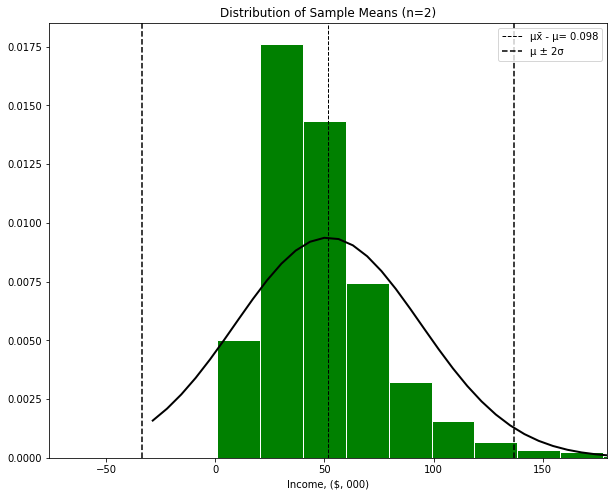

In [147]:
plot_sample_means(income, xlab='Income, ($, 000)', sample_size=2)

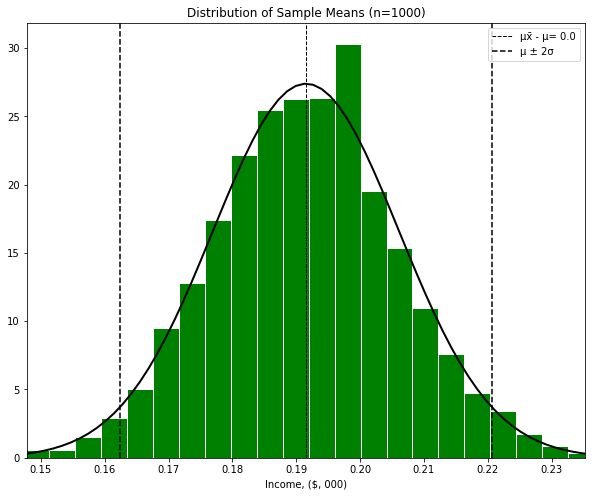

In [148]:
plot_sample_means(df['union'], xlab='Income, ($, 000)', sample_size=1000)

# Exercise: counting heads
By modifying variables in the code above, create and plot a distribution of heights for *men* in the USA. Use of wikipedia and the internet is allowed. Social media is not.

How many men in America are average height? (Hint: think about the "sample" variable)

*Extension:* How many men in the USA are within 7cm of the mean?

# In the bin

Slightly more subtly, the bin size might affect our answers to some of these questions. In order to create a distribution, we need to *bin* data to create the graph that we've created - a *histogram* which we expect to reflect the probability mass function. If I give you a string of heights (1.1, 1.5, 1.6, 1.2, 1.8, 1.4, 1.0, 1.55, 1.74, etc) you can probably see that they cluster around 1.5 or thereabouts, but to graph them as a histogram, you need to choose a bin size and range. Let's say we choose 10 bins, starting at 1m and each bin is 0.1m bigger. So if the height h is 1.0 $\leq$ h < 1.1, it goes into the first bin, if 1.1 $\leq$ h < 1.2 in the second and so on. For this data, we'd see one entry in the first bin, one in the second, a few around the middle and only one in the higher echelons.

This is pretty basic and you're probably familiar with it. But you need to choose the number of bins appropriately for the data set - and that's very sensitive to the number of samples you have.

# Exercise: Keep Gaussians Tidy

In the above code, increase the number of bins to 1000 - what do you notice?

Reduce the number of bins to 10 - what happens now? What's causing this effect?

Reduce the number of samples to 1000. What affect does this have on the histogram?

How can you use this information for plotting and binning data?

*Extension*: to find more about the function used to sample these random numbers above, take a look at the Python documentation: http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html)

# Some Normal Behaviours

Let's look at the mean and standard deviation on the graph. We can calculate the mean and standard deviation of our (synthetic) dataset a by using the np.mean() and np.std() methods. 

Recall that the . notation means we're using a method from "inside" the numpy library.

In [149]:
#as we did before...
plt.hist(heights, bins, histtype='step')
#draw the mean
plt.axvline(numpy.mean(heights), color = 'r')
sd = numpy.std(heights)
#draw mean + one s.d.
plt.axvline(numpy.mean(heights) + sd, color='k')
#draw mean - one s.d.
plt.axvline(numpy.mean(heights) - sd, color = 'k')
plt.xlabel('Height [cm]')
plt.ylabel('Frequency')
plt.title('Fake Heights')

NameError: name 'heights' is not defined

Gaussians have some nice standard properties - for example, 68% of the data lies within one standard deviation of the mean. That means in our example above, 2/3 of women in the UK are between 1.57m and 1.69m tall. With a Gaussian, 95% of data is within two standard deviations - so 95% of women in the UK are at least 1.51m tall, and shorter than 1.75m. So this starts to answer some of our questions we posed initially - from a random sample, there is a 1 in 40 chance of a woman in the uk being taller than 1.75m. **How did I arrive at that figure?**

Let's also plot the *median* of the Gaussian:

Text(0.5, 1.0, 'Fake Heights')

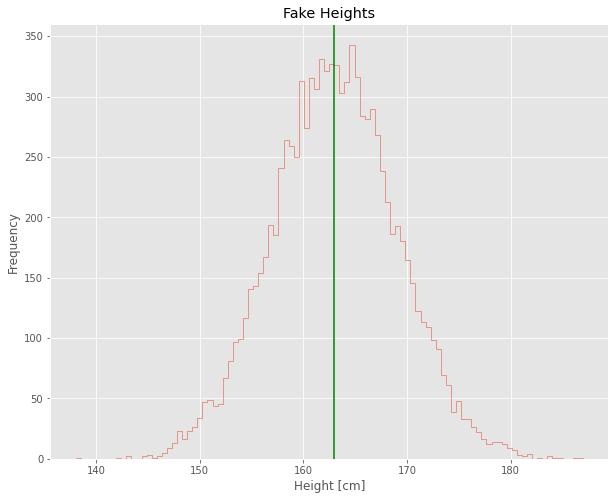

In [ ]:
#as we did before...
plt.hist(heights, bins, histtype='step')
#draw the median
plt.axvline(numpy.median(heights), color = 'g')
plt.xlabel('Height [cm]')
plt.ylabel('Frequency')
plt.title('Fake Heights')

# Question: 
Why is the mean the same as the mean (and the mode)?

Not all probability distributions follow the same logic, though - sometimes a sample is possible - even likely - even if it is dozens of times the mean, which for height would be tens of metres tall. More generally, we can start to unpick the shape of a probability curve using *moments*.

# Asymmetric Distributions

We won't talk about how we decide what the best fit for a dataset is - suffice it to say that a Gaussian doesn't always fit the bill. In those cases, the general curve we're dealing with will have a more complex form.

(*Sometimes we can know that from the underlying process generating the data - other times we don't, and it's analysing the shape of the data that tells us*)

Text(0, 0.5, 'Frequency')

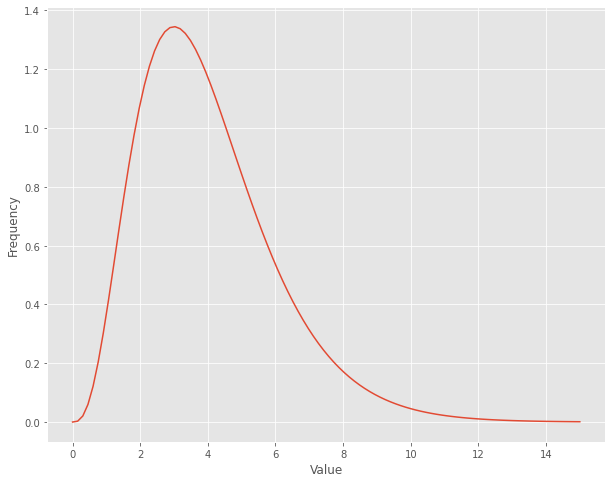

In [ ]:
x_val= numpy.linspace(0,15,100)
y_val = (x_val**3)*numpy.exp(-x_val)
plt.plot(x_val,y_val)
plt.xlabel('Value')
plt.ylabel('Frequency')

How do we characterise a dataset which is complex, asymmetric, or we don't know the underlying form?

Magic Moments
=================

Without going into the mathematical detail yet, you can think about moments as being increasingly nuanced ways of describing distributions. There are an infinite number of them, but you can understand the first few inituitively. 

0th moment
----------

0th moment is just area under the curve. In this case it would just be the number of people sampled. It doesn't tell us much.

1st moment
----------

1st moment is a central "tendency" or average value of the distribution. In a Gaussian, the mean (average) $\mu$ is the average and the centre. But there are other ways of representing this characteristic, like mode or median, as we will see.

2nd moment
----------

Second moment represents the *width* or *spread* of the curve. $\sigma$ is calculated from the second moment, and in a Gaussian represents the width of the curve. Interquartile range is another way of doing this, or half-life. 

3rd moment
----------

The third moment is related to how *asymmetrical* a curve is, and the usual way to quantify this is *skewness*. A Gaussian is symmetric, so its skewness is zero. Actually, all moments apart from 0, 1 and 2 are zero for a Gaussian.

4th moment
----------

The standard way to calculate a fourth moment is *Kurtosis*. This is a measure of how "peaky" or "taily" a curve is. It's a bit harder to visualise what we're on about at this point, but it's worth remembering that a Gaussian has a Kurtosis of 0, so isn't very "taily".

Other moments
-------------

It's harder to interpret what they mean, but an arbitrary probability distribution may need an *infinite* series of moments to be described correctly. Gaussians are unusual in that they require only two parameters to describe them; if your data looks Gaussian, that makes life easier in many ways.

**Extension**: there are distributions which are simple to write down that nevertheless are described by an infinite series of moments; and some, like the Lorentzian, are quite nice functions that have infinite values for most of their moments.

## Recap: The Median

The *median* is different from the mean. The median of a data set is an element that seperates the higher half of the data from the lower half. For example, the median of $A = \left \{1,2,3,4,5\right \}$ is 3, and 3 is also the median of $B = \left \{1,2,3,9,10\right \}$. 
When a data set has an even number of members like $C = \left \{1,2,3,4\right \}$, the median is defined as the average of the top lower half and the lower top half, so the median of C is (2+3)/2=2.5 . 

**Advanced**: How did we define the median from a distribution (hint: consider area under curve and what it means)? What about quartiles? What about deciles? What are these quantities?

## Exercise  
Under which conditions is the median equal to the mean? (hint: look at the normal distribution - but think more broadly abouting how "counting" and "area under curve" are related in histograms).

## Exercise 
Construct a set of 5 numbers such that the median is half the value of the mean. 

## Power Laws

Another type of important distributions are **power law** distributions. When the probability of a variable to take the value of $x$ is roughly
$\frac{1}{x^k}$ we say that $x$ has a power law distribution with exponent $k$.

For instance let's plot a power law function with exponent 3. 

We start off by generating an array of 100 numbers between 1 and 10; numpy.linspace() lets us do this (here is the documentation if you want to find out more: http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)

(1.0, 5.0)

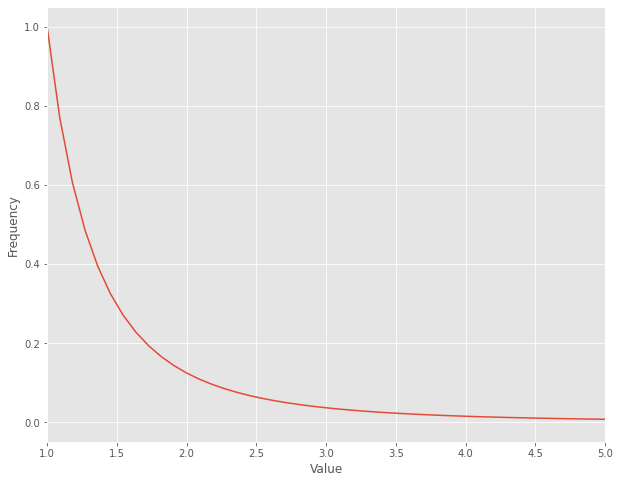

In [ ]:
x_val= numpy.linspace(1,10,100)
#** is "to the power of" in Pythonese
y_val = 1/x_val**3
plt.plot(x_val,y_val)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(1,5)

An important class of power law distributions are called **Pareto** type distributions. Consider for instance, the distribution of income in a city. We will find that about 20% of the population has 80% of the wealth, this is also known as a 80:20 law. 

Text(0, 0.5, 'Frequency')

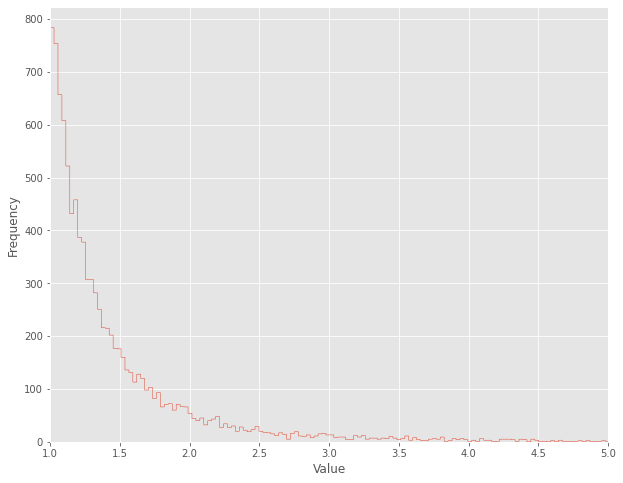

In [ ]:
sample = 10000
exponent = 3

bins = 1000


y = 1 + numpy.random.pareto(exponent, sample)

plt.hist(y, bins, histtype='step')
plt.xlim((1, 5))
plt.xlabel('Value')
plt.ylabel('Frequency')

## Exercise: 
Add lines showing the mean, mode and median to the above graph, and comment on this with a box of markdown.

## Comments:
We plotted the mean, mode and median of the distribution...

## Extension: Quantifying Datasets Which Cover a Wide Range of Values.
Objects like the mean present a problem for power laws - in some cases, they diverge. So, for the mathematicians, if the exponent is 1, we can approximate the mean by

$\mu = \int_0^{\infty}dx \frac{1}{x}*x = \int_0^{\infty}dx = \infty$!

which gives a nonsensical value. Larger exponents (larger than 2) ensure this doesn't occur - but what sense does the mean make when there are people earning 10, 100 or 1000 times that mean value?

When datasets cover many orders of magnitude (here from 33 to 2090), we may need to think about *geometrical* methods for understanding its properties. For the mean, we might consider the *geometrical mean*, achieved by mutiplying the 100 values together and taking the 100th root. To understand the width, we might use a half-life type measure. Half-life is the "time" it takes for a radioactive source to reach half its current level of radioactivity; but we can think about applying this to other situations, where "time" is replaced by "percentile" and "radioactivity" is replaced by "income", for example.

## Extension: Bimodal Distributions

Sometimes distributions are *Bimodal* or multimodal. What this literally means is that they have multiple "modes" - most popular values - i.e. peaks. In these cases, mean may not be the best measure and we may need to think about these two (or larger number of) peaks relates to different segments of our sample or population.

Text(0, 0.5, 'Frequency')

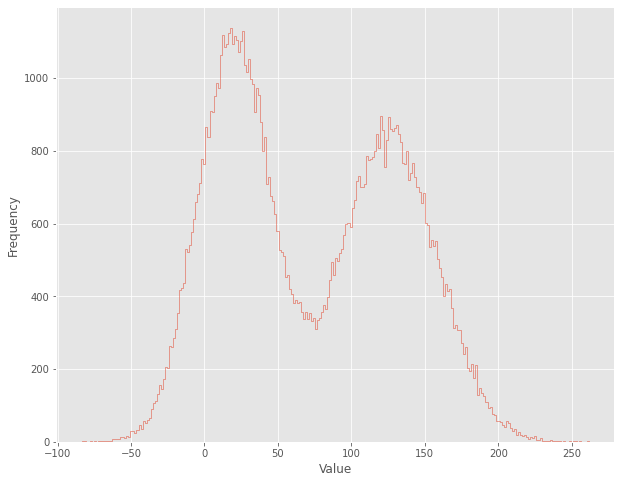

In [ ]:
sample = 100000
a = 25 * numpy.random.randn(sample) + 20
for i in range(int(sample/2)):
    a[i] = a[i]*1.3+100
plt.hist(a, 250, histtype='step');
plt.xlabel('Value')
plt.ylabel('Frequency')

## Exercise: 

Plot the mean and median for the above graph. What might be better statistics? How might you find them?